In [1]:
pip install statsmodels

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

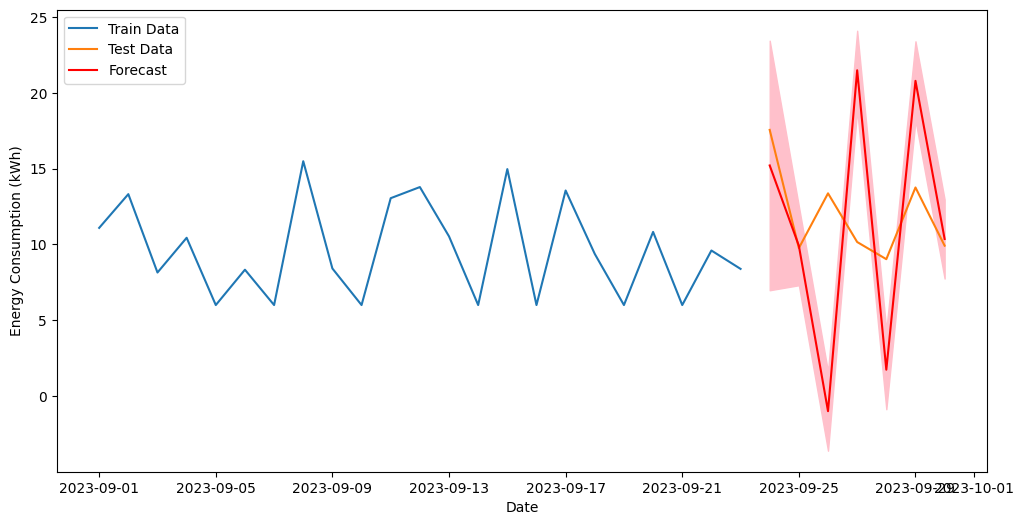

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Membaca data dari file CSV (pastikan Anda memiliki file CSV dengan data Anda)
data = pd.read_csv('daily_energy_consumption.csv')

# Konversi kolom tanggal menjadi indeks waktu
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memisahkan data menjadi set data pelatihan dan pengujian
train_data = data['Energy Consumption (kWh)'][:-7]
test_data = data['Energy Consumption (kWh)'][-7:]

# Membangun model SARIMA
model = sm.tsa.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Membuat prediksi
forecast = results.get_forecast(steps=7)

# Mendapatkan prediksi dan interval kepercayaan
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


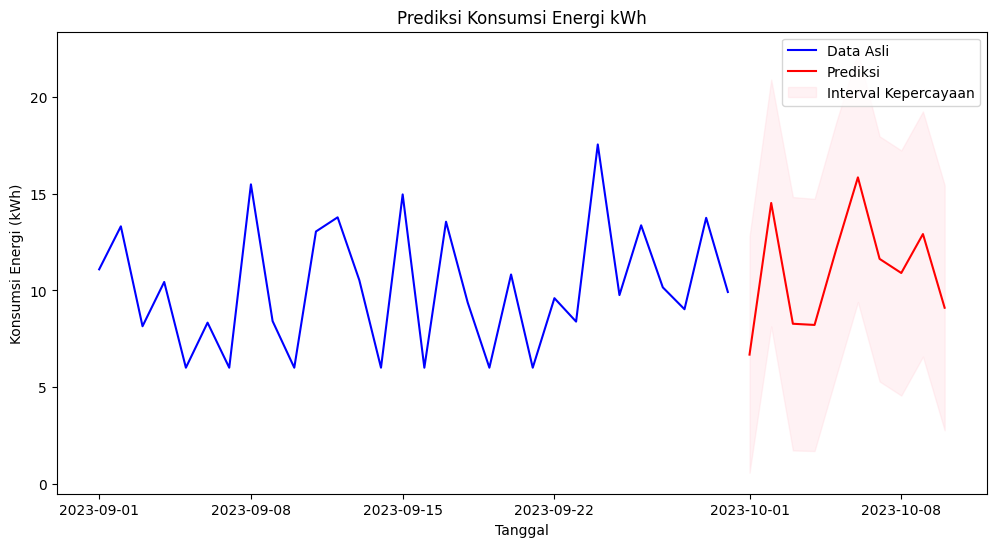

Prediksi Konsumsi Energi kWh untuk 10 hari ke depan:
2023-10-01     6.677201
2023-10-02    14.529052
2023-10-03     8.275612
2023-10-04     8.214420
2023-10-05    12.135391
2023-10-06    15.855349
2023-10-07    11.634973
2023-10-08    10.903453
2023-10-09    12.920205
2023-10-10     9.104446
Freq: D, Name: predicted_mean, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Baca data dari CSV
data = pd.read_csv('daily_energy_consumption.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Tentukan model SARIMA
order = (1, 1, 1)  # P, D, Q untuk komponen non-musiman
seasonal_order = (1, 1, 1, 12)  # P, D, Q, S untuk komponen musiman

model = SARIMAX(data['Energy Consumption (kWh)'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Prediksi untuk 10 hari ke depan
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)

# Grafik data asli
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy Consumption (kWh)'], label='Data Asli', color='blue')

# Grafik prediksi
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Prediksi')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2, label='Interval Kepercayaan')

# Menambahkan label dan legend
plt.title('Prediksi Konsumsi Energi kWh')
plt.xlabel('Tanggal')
plt.ylabel('Konsumsi Energi (kWh)')
plt.legend()
plt.show()

# Menampilkan prediksi untuk 10 hari ke depan
print("Prediksi Konsumsi Energi kWh untuk 10 hari ke depan:")
print(forecast_mean)


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

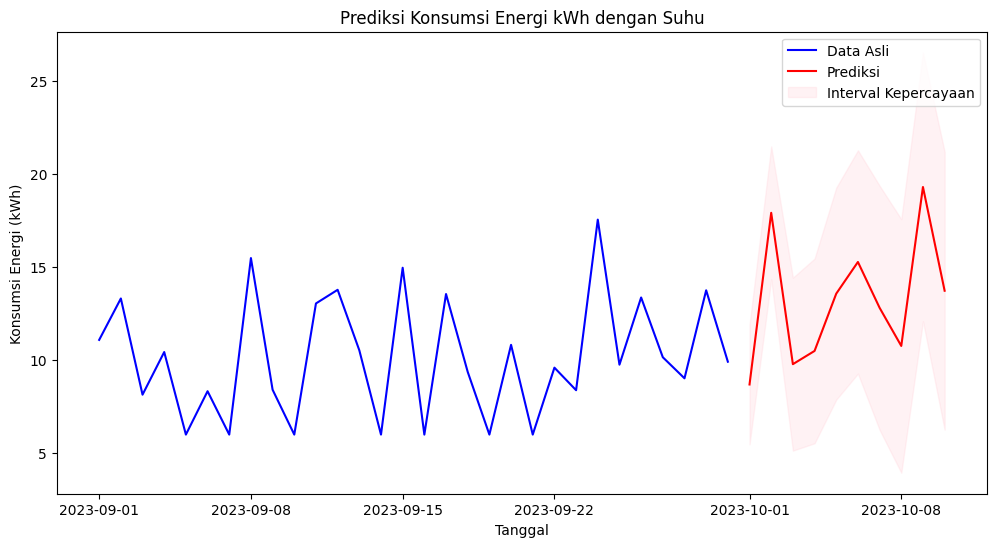

Prediksi Konsumsi Energi kWh untuk 10 hari ke depan:
2023-10-01     8.695278
2023-10-02    17.927699
2023-10-03     9.787791
2023-10-04    10.499213
2023-10-05    13.578853
2023-10-06    15.283425
2023-10-07    12.819583
2023-10-08    10.767910
2023-10-09    19.316089
2023-10-10    13.736111
Freq: D, Name: predicted_mean, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Baca data dari CSV
data = pd.read_csv('daily_energy_consumption.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Menambahkan data suhu maksimum dan suhu minimum
data['Temperature High (°C)'] = data['Temperature High (°C)']
data['Temperature Low (°C)'] = data['Temperature Low (°C)']

# Tentukan model SARIMA dengan variabel exogen
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(data['Energy Consumption (kWh)'], exog=data[['Temperature High (°C)', 'Temperature Low (°C)']],
                order=order, seasonal_order=seasonal_order)
results = model.fit()

# Prediksi untuk 10 hari ke depan dengan suhu yang diberikan
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps, exog=data.iloc[-forecast_steps:][['Temperature High (°C)', 'Temperature Low (°C)']])

# Grafik data asli dan prediksi
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy Consumption (kWh)'], label='Data Asli', color='blue')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Prediksi')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2, label='Interval Kepercayaan')
plt.title('Prediksi Konsumsi Energi kWh dengan Suhu')
plt.xlabel('Tanggal')
plt.ylabel('Konsumsi Energi (kWh)')
plt.legend()
plt.show()

# Menampilkan prediksi untuk 10 hari ke depan
print("Prediksi Konsumsi Energi kWh untuk 10 hari ke depan:")
print(forecast_mean)
